<a href="https://colab.research.google.com/github/AnqurEnayet/Sentiment-Analysis-For-Movie-Reviews/blob/main/Sentiment_Analysis_Using_Imdb_Movie_Review_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading the data
df = pd.read_csv('https://raw.githubusercontent.com/MehmetFiratKomurcu/IMDBReviewClassification/master/imdb_master.csv', encoding = 'latin-1', index_col = 0)
df


,type,review,label,file
0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
...,...,...,...,...
49995,train,"Seeing as the vote average was pretty low, and...",pos,9998_9.txt
49996,train,"The plot had some wretched, unbelievable twist...",pos,9999_8.txt
49997,train,I am amazed at how this movie(and most others ...,pos,999_10.txt
49998,train,A Christmas Together actually came before my t...,pos,99_8.txt


In [4]:
#preprocessing
movies = df.copy()

In [5]:
#Data Cleaned
movies.drop(["file","type"], axis=1, inplace=True)

In [6]:
movies = movies[movies['label'].isin(['pos', 'neg'])]
movies

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
49995,"Seeing as the vote average was pretty low, and...",pos
49996,"The plot had some wretched, unbelievable twist...",pos
49997,I am amazed at how this movie(and most others ...,pos
49998,A Christmas Together actually came before my t...,pos


In [7]:

#function for removing the html tags
#"<.*?>"" in this "<>"" this part will find any type of string covered with this tag "<>"
#The .*? part matches any character (except newline) in a non-greedy way, ensuring that it stops at the first closing angle bracket (>)
import re

def clean_html_tags(text):
    cleaned_text = re.sub('<.*?>', '', text)
    return cleaned_text

movies['review'] = movies['review'].apply(clean_html_tags)

In [23]:
#Making everything lowercase
movies['review'] = movies['review'].str.lower()

In [9]:
#Tokenizing the reviews
import nltk

nltk.download('punkt')  # Download required resource for tokenization



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
movies['review'] = movies['review'].apply(nltk.word_tokenize)

In [25]:
#removing stopwords
nltk.download('stopwords')  # Download required resource for stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
#implementing the function to clean the stopwords

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokens):
    filtered_tokens = [i for i in tokens if i not in stopwords]
    return filtered_tokens

movies['review'] = movies['review'].apply(remove_stopwords)

In [27]:
movies['review']

0        [mr., costner, drag, movi, far, longer, necess...
1        [exampl, major, action, film, ., gener, bore, ...
2        [first, hate, moron, rapper, ,, could'nt, act,...
3        [even, beatl, could, write, song, everyon, lik...
4        [brass, pictur, (, movi, fit, word, ), realli,...
                               ...                        
49995    [see, vote, averag, pretti, low, ,, fact, cler...
49996    [plot, wretch, ,, unbeliev, twist, ., howev, ,...
49997    [amaz, movi, (, averag, 5, star, lower, crappi...
49998    [christma, togeth, actual, came, time, ,, 've,...
49999    [working-class, romant, drama, director, marti...
Name: review, Length: 50000, dtype: object

In [28]:
#stemming
from nltk.stem import PorterStemmer

In [29]:
stemmer = PorterStemmer()

def apply_stemming(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

movies['review'] = movies['review'].apply(apply_stemming)

In [13]:
#finishing preprocessing
#movies['review'] = movies['review'].apply(' '.join)

In [30]:
movies['review']

0        [mr., costner, drag, movi, far, longer, necess...
1        [exampl, major, action, film, ., gener, bore, ...
2        [first, hate, moron, rapper, ,, could'nt, act,...
3        [even, beatl, could, write, song, everyon, lik...
4        [brass, pictur, (, movi, fit, word, ), realli,...
                               ...                        
49995    [see, vote, averag, pretti, low, ,, fact, cler...
49996    [plot, wretch, ,, unbeliev, twist, ., howev, ,...
49997    [amaz, movi, (, averag, 5, star, lower, crappi...
49998    [christma, togeth, actual, came, time, ,, 've,...
49999    [working-class, romant, drama, director, marti...
Name: review, Length: 50000, dtype: object

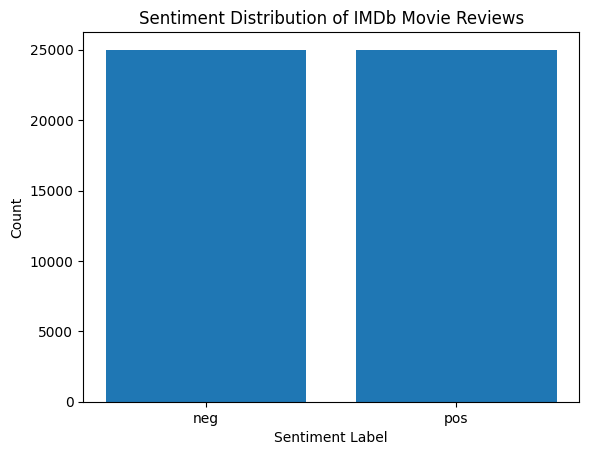

In [31]:
# Count the number of positive and negative reviews
sentiment_counts = movies['label'].value_counts()

# Create a bar plot to visualize sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution of IMDb Movie Reviews')
plt.show()

In [32]:
#Feature extraction using word2vec
from gensim.models import Word2Vec

word2vec_model = Word2Vec(movies['review'], vector_size=100, window=5, min_count=1, sg=1, negative=4, workers=5)

In [21]:
word2vec_model

In [34]:
#extracting the feature by creating feature vector

feature_vectors = []
for review in movies['review']:
    review_vector = []
    for word in review:
        if word in word2vec_model.wv:
            review_vector.append(word2vec_model.wv[word])
    if review_vector:
        feature_vectors.append(np.mean(review_vector, axis=0))
    else:
        feature_vectors.append(np.zeros(word2vec_model.vector_size))


In [35]:
#function that runs model different models
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [39]:
#implementing random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = feature_vectors
y = movies['label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = train_model(rf, X_train, y_train)

In [40]:
#prediction
rf_pred = rf.predict(X_test)

In [43]:
#accuracy checking
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(rf_pred, y_test)
rf_accuracy

0.8106